In [22]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

In [23]:
model_1 = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab7\code_1.stan')
model_2 = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab7\code_2.stan')
model_3 = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab7\code_3.stan')
model_4 = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab7\code_4.stan')
model_5 = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab7\code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [31]:
F=7
L=6
N = (L+F)*100
stan_data = {
    "N":N,
}

In [32]:
sample1 = model_1.sample(stan_data, iter_sampling=1000, iter_warmup=1,  chains =1)
sample2 = model_2.sample(stan_data, iter_sampling=1000, iter_warmup=1, chains =1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |██████████| 00:05 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


[ 0.469308 -0.023248  1.29674  ... -0.917452 -0.67805  -0.225184]
[-0.158198  3.98039   1.50049  ... -0.445953 -3.05788   0.160939]


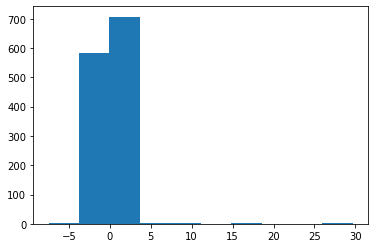

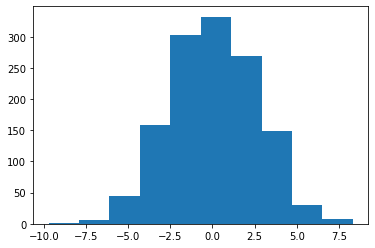

In [33]:
y1 = sample1.stan_variable('y')[0]
print(y1)

y2 = sample2.stan_variable('y')[0]
print(y2)

data1 = {
    'N': N,
    'y': y1
}

data2 = {
    'N': N,
    'y': y2
}

plt.hist(y1)
plt.show()
plt.hist(y2)
plt.show()

exercise 2

In [35]:
fit3=model_3.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit3_2=model_3.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

fit4=model_4.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit4_2=model_4.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [36]:
compare_dict_1 = {'model_3': fit3,'model_4': fit4}
compare_dict_2 = {'model_3': fit3_2,'model_4': fit4_2}

model_compare_waic_1 = az.compare(compare_dict_1, ic = 'waic')

print(model_compare_waic_1.head())
az.plot_compare(model_compare_waic_1)
plt.title('For data from model 1')

model_compare_waic_2 = az.compare(compare_dict_2, ic = 'waic')

print(model_compare_waic_2.head())
az.plot_compare(model_compare_waic_2)
plt.title('For data from model 2')


C:\Users\Jaskier-PC\anaconda3\envs\Data_Anal\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


TypeError: log likelihood not found in inference data object

In [37]:
model_compare_loo_1 = az.compare(compare_dict_1, ic="loo", method="stacking", scale="log")

print(model_compare_loo_1.head())
az.plot_compare(model_compare_loo_1)
plt.title('For data from model 1')

model_compare_loo_2 = az.compare(compare_dict_2, ic = 'loo')

print(model_compare_loo_2.head())
az.plot_compare(model_compare_loo_2)
plt.title('For data from model 2')

TypeError: log likelihood not found in inference data object